<h1>A Personalized BDM Mechanism for Efficient Market Intervention Experiments</h1>

<h2>Imanol Arrieta Ibarra & Johan Ugander</h2>

<h3>Experiment Analysis</h3>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib
from matplotlib import pyplot as plt
from scipy.interpolate import BSpline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rc('pdf',fonttype = 42)

In [2]:
def ApplyFont(ax):

    ticks = ax.get_xticklabels() + ax.get_yticklabels()

    text_size = 14.0

    for t in ticks:
        t.set_fontname('Times New Roman')
        t.set_fontsize(text_size)

    txt = ax.get_xlabel()
    txt_obj = ax.set_xlabel(txt)
    txt_obj.set_fontname('Times New Roman')
    txt_obj.set_fontsize(text_size)

    txt = ax.get_ylabel()
    txt_obj = ax.set_ylabel(txt)
    txt_obj.set_fontname('Times New Roman')
    txt_obj.set_fontsize(text_size)

    txt = ax.get_title()
    txt_obj = ax.set_title(txt)
    txt_obj.set_fontname('Times New Roman')
    txt_obj.set_fontsize(text_size)

Load Data (Data has been previously been taken from logs and organized into a pandas dataframe so that it does not contain identifyable information. The BDM data is a subset of all the users who were assigned to this condition. In order to make BDM and PBDM comparable we took a random subset of the users assigned to BDM. The whole dataset is contained in data.tsv)

In [3]:
df = pd.read_csv("data.csv")
np.random.seed(42)

In [4]:
df_pbdm = df[df['offerType']=="PBDM"].reset_index(drop=True)
df_bdm = df[df['offerType']=="BDM"].reset_index(drop=True)

n_pbdm,_ = df_pbdm.shape
df_bdm = df_bdm.loc[np.random.choice(range(112),size=n_pbdm,replace=False)].reset_index(drop=True)


In [5]:
reversed(range(3))

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)


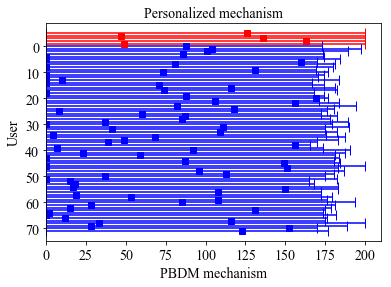

In [6]:
f = plt.figure()
for j in range(5):
    x_value = df_bdm['pbdmOffer'].loc[j]
    ub = df_bdm['ub'].loc[j]
    plt.errorbar(y=[j-5], x=x_value,fmt='s',capsize=5,xerr=[[x_value],[ub-x_value]],color="red",linestyle="--")

for i in (range(n_pbdm)):
    x_value = df_pbdm['pbdmOffer'].loc[i]
    ub = min(df_pbdm['ub'].loc[i],200)
    plt.errorbar(y=[i], x=x_value,fmt='s',capsize=5,xerr=[[x_value],[ub-x_value]],color="blue")
    plt.xlim([0,210])
    plt.xlabel('PBDM mechanism',fontsize=16)
    plt.ylabel('User',fontsize=16)
    plt.title('Personalized mechanism',fontsize=16)

plt.gca().invert_yaxis()
ApplyFont(plt.gca())

f.savefig("mechanism.pdf", bbox_inches='tight')

In [7]:
np.mean(df_bdm['treated'])

0.31944444444444442

<h4>Costs for the experiment</h4>

In [8]:
cost_bdm = sum(((df_bdm['nCorrect']-(20-df_pbdm['nCorrect']))*10-df_bdm['pbdmOffer']*(df_bdm['treated'])).apply(lambda x:max(0,x)))
cost_bdm_total = np.sum(cost_bdm)
cost_bdm_pc = np.sum(cost_bdm)/np.sum(df_bdm['treated'])


cost_pbdm = sum(((df_pbdm['nCorrect']-(20-df_pbdm['nCorrect']))*10-df_pbdm['pbdmOffer']*(df_pbdm['treated'])).apply(lambda x:max(0,x)))
cost_pbdm_total = np.sum(cost_pbdm)
cost_pbdm_pc = np.sum(cost_pbdm)/np.sum(df_pbdm['treated'])

print(" Cost BDM: %s \n Cost BDM per unit treated: %s\n Cost PBDM: %s\n Cost PBDM per unit treated: %s/n" %
     (cost_bdm_total,cost_bdm_pc,cost_pbdm_total,cost_pbdm_pc))


 Cost BDM: 5469 
 Cost BDM per unit treated: 237.782608696
 Cost PBDM: 6146
 Cost PBDM per unit treated: 161.736842105/n


<h4>Number of Users</h4>

In [9]:
print("Number of BDM participants: %s" %df_bdm.shape[0])
print("Number of PBDM participants: %s" %df_pbdm.shape[0])

Number of BDM participants: 72
Number of PBDM participants: 72


<h4>Budget Regret</h4>

In [10]:
regret_bdm = sum((df_bdm['pbdmBid'] - df_bdm['pbdmOffer']) * df_bdm['treated']) / sum(df_bdm['treated'])
regret_pbdm = sum((df_pbdm['pbdmBid'] - df_pbdm['pbdmOffer']) * df_pbdm['treated']) / sum(df_pbdm['treated'])
print(" Budget Regret BDM: %s\n Budget Regret PBDM: %s\n"%(regret_bdm,regret_pbdm))

 Budget Regret BDM: 65.0
 Budget Regret PBDM: 46.81578947368421



<h4>Mechanism</h4>

13 16 48 67 2.0 7.0 16.15
13 23 48 60 2.0 7.0 15.0
25 33 36 50 2.0 5.0 14.0
30 40 31 43 2.0 5.0 14.525
45 59 13 22 2.0 7.0 15.45
54 73 4 8 2.0 5.0 10.9
92
0.638888888889
43
49
18
34
-154.075
6.0
137.875


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


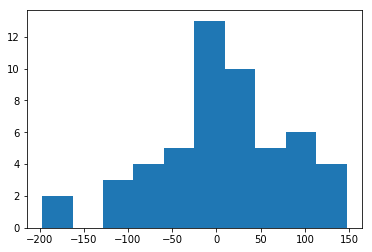

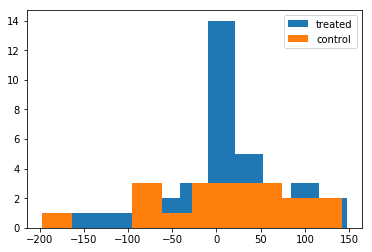

In [11]:
df = df_bdm.append(df_pbdm).reset_index(drop=True)


def understanding(df):
    perc = []
    quant = []
    for i in range(1,7):
        df['irrational_'+str(i)] = df['tutorial_game_credits_'+str(i)]-df['tutorial_max_credits_'+str(i)]
        boot_ls = []
        for j in range(1000):
            boot_ls.append(np.mean((df['irrational_'+str(i)]<2)[np.random.choice(range(len(df['irrational_'+str(i)])),
                                                                                 size=142)]))
        perc.append(np.percentile(boot_ls,50))
        quant.append((np.percentile(boot_ls,2.5),np.percentile(boot_ls,97.5)))
        print(np.sum(df[(df['irrational_'+str(i)]<2)]['treated']))
        
        
    return perc,quant

def understanding_2(df):
    for i in range(1,7):
        df['irrational_'+str(i)] = df['tutorial_game_credits_'+str(i)]-df['tutorial_max_credits_'+str(i)]
        print(np.sum(df[(df['irrational_'+str(i)]<2)]['treated']),np.sum(1-df[(df['irrational_'+str(i)]<2)]['treated']),
             np.sum(df[(df['irrational_'+str(i)]>=2)]['treated']),np.sum(1-df[(df['irrational_'+str(i)]>=2)]['treated']),
             np.percentile(df[(df['irrational_'+str(i)]>=2)]['irrational_'+str(i)],q=2.5),
             np.percentile(df[(df['irrational_'+str(i)]>=2)]['irrational_'+str(i)],q=50),
             np.percentile(df[(df['irrational_'+str(i)]>=2)]['irrational_'+str(i)],q=97.5))
        
understanding_2(df)
def rational_check(df):
    df['diff_wtp'] = df['pbdmRegret']-df['pbdmBid']
    rational = (df['diff_wtp']==0)
    irrational = (df['diff_wtp']!=0) 
    n_rational = np.sum(rational)
    n_irrational = np.sum(irrational)
    print(n_rational)
    print(n_rational/float(n_rational+n_irrational))
    df_rational = df[rational].reset_index(drop=True)
    print(np.sum(df_rational['treated']))
    print(np.sum(1-df_rational['treated']))
    df_irrational = df[irrational].reset_index(drop=True)
    print(np.sum(df_irrational['treated']))
    print(np.sum(1-df_irrational['treated']))
    print(np.percentile(df_irrational['diff_wtp'],2.5))
    print(np.percentile(df_irrational['diff_wtp'],50))
    print(np.percentile(df_irrational['diff_wtp'],97.5))

    
    df_irrational_treated = df_irrational[df['treated']==1].reset_index(drop=True)
    df_irrational_control = df_irrational[df['treated']==0].reset_index(drop=True)
    plt.figure()
    plt.hist(df_irrational['diff_wtp'],label="rational users")
    plt.figure()
    plt.hist(df_irrational_control['diff_wtp'],label="treated")
    plt.hist(df_irrational_treated['diff_wtp'],label="control")
    plt.legend()

rational_check(df)





In [12]:
perc,quant = understanding(df)

13
13
25
30
45
54


[0.20070422535211269, 0.24647887323943662, 0.40140845070422537, 0.4859154929577465, 0.71830985915492962, 0.88028169014084512]
[(0.13380281690140844, 0.26760563380281688), (0.18309859154929578, 0.323943661971831), (0.31690140845070425, 0.4859154929577465), (0.40845070422535212, 0.56338028169014087), (0.64084507042253525, 0.78873239436619713), (0.823943661971831, 0.92957746478873238)]


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)


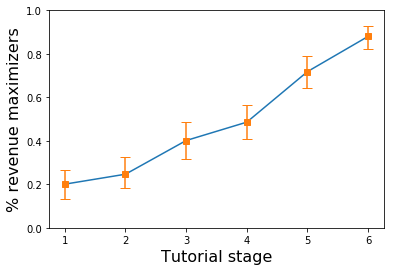

In [13]:
f = plt.figure()
plt.scatter(['1','2','3','4','5','6'],perc)
plt.plot(['1','2','3','4','5','6'],perc)
plt.errorbar(x=['1','2','3','4','5','6'], y=perc,fmt='s',capsize=5,yerr=[[-quant[i][0] + perc[i] for i in range(6)],
                                                                          [quant[i][1] - perc[i] for i in range(6)]])
plt.ylim((0,1))
plt.xlabel("Tutorial stage",fontsize=16)
plt.ylabel("% revenue maximizers",fontsize=16)
print(perc)
print(quant)
f.savefig("understanding.pdf", bbox_inches='tight')

In [14]:
df['prop']

0      0.255000
1      0.025000
2      0.305000
3      0.305000
4      0.255000
5      0.505000
6      0.035000
7      0.025000
8      0.205000
9      0.005000
10     0.380000
11     0.955000
12     0.105000
13     0.005000
14     0.270000
15     0.505000
16     0.999000
17     0.030000
18     0.610000
19     0.999000
20     0.005000
21     0.305000
22     0.030000
23     0.805000
24     0.999000
25     0.505000
26     0.025000
27     0.155000
28     0.180000
29     0.205000
         ...   
114    0.172423
115    0.528744
116    0.278974
117    0.415168
118    0.320902
119    0.209142
120    0.975000
121    0.286980
122    0.627405
123    0.359060
124    0.247998
125    0.895362
126    0.286060
127    0.604912
128    0.399139
129    0.163722
130    0.175893
131    0.687518
132    0.679761
133    0.155893
134    0.292667
135    0.867832
136    0.391058
137    0.236359
138    0.975000
139    0.160784
140    0.256495
141    0.370722
142    0.975000
143    0.262792
Name: prop, Length: 144,

<h4>Calibration Plot for Propensity Score</h4>

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=n

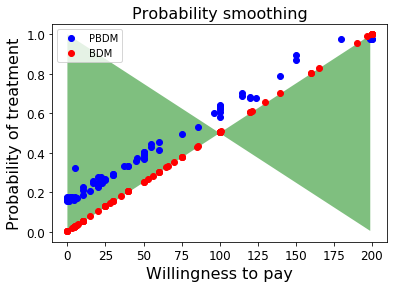

In [15]:
df_pbdm['calibration_bin'] = (df_pbdm['prop']*5).astype(int)/5.0
df_bdm['calibration_bin'] = (df_bdm['prop']*5).astype(int)/5.0
df_pbdm['treated_int'] = df_pbdm['treated'].astype(int)
df_bdm['treated_int'] = df_bdm['treated'].astype(int)
calibration_pbdm = df_pbdm.groupby(['calibration_bin']).mean()['prop']
calibration_bdm = df_bdm.groupby(['calibration_bin']).mean()['prop']

fig, ax = plt.subplots()
ax.plot(df_pbdm['pbdmBid'],df_pbdm['prop'],'bo',label="PBDM")
ax.plot(df_bdm['pbdmBid'],df_bdm['prop'],'ro',label="BDM")
plt.xlabel("Willingness to pay", fontsize=16)
plt.ylabel("Probability of treatment", fontsize=16)
plt.legend()
ax.fill_between(np.arange(100), np.arange(0,0.5,0.5/100), np.arange(1,0.5,-0.5/100),facecolor='green',alpha=0.5)
ax.fill_between(np.arange(100,200), np.arange(0.5,0,-0.5/100), np.arange(0.5,1,0.5/100),facecolor='green',alpha=0.5)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
plt.title("Probability smoothing", fontsize=16)
fig.savefig("pbdm_improv_eps.pdf", bbox_inches='tight')

<h4>Block ATE </h4>

In [16]:
# Strat ATE

def miniATE(x):
    treatment = np.sum(np.array(x['nCorrect'])*np.array(x['treated']))/float(np.sum(np.array(x['treated'])))
    control  = np.sum(np.array(x['nCorrect'])*(1-np.array(x['treated'])))/float(np.sum((1-np.array(x['treated']))))
    ate = treatment-control
    return ate

def stratSd(x):
    n_c = float(np.sum((1-np.array(x['treated']))))
    n_t = float(np.sum(np.array(x['treated'])))
    mu_c = np.sum(np.array(x['nCorrect'])*(1-np.array(x['treated'])))/n_c
    mu_t =  np.sum(np.array(x['nCorrect'])*np.array(x['treated']))/n_t
    dif_squared_c = np.sum(((np.array(x['nCorrect'])-mu_c)**2)*(1-np.array(x['treated'])))/(n_c**2)
    dif_squared_t = np.sum(((np.array(x['nCorrect'])-mu_t)**2)*(np.array(x['treated'])))/(n_t**2)
    return np.sqrt(dif_squared_c+dif_squared_t)

def block_ate(df,name):
    dfn = df.copy()
    #dfn['perc'] = pd.qcut(df['prop'],5,labels=False)
    strat_ate = dfn.groupby(['calibration_bin']).apply(lambda x: miniATE(x))
    strat_weight =  dfn.groupby(['calibration_bin']).count()['treated_int']
    not_nan = strat_ate.apply(lambda x: x>0)
    strat_weight = strat_weight[not_nan]/sum(strat_weight[not_nan])
    strat_ate = dfn.groupby(['calibration_bin']).apply(lambda x: miniATE(x))[not_nan]
    strat_var = dfn.groupby(['calibration_bin']).apply(lambda x: stratSd(x))[not_nan]
    sd  = np.sqrt(np.dot(np.array(strat_var),np.array(strat_weight)))
    ate = np.dot(np.array(strat_ate),np.array(strat_weight))
    print(name)
    print("Block: "+str(ate))
    print("sd: "+str(sd))
    return(ate,sd)

block_pbdm,sd_block_pbdm = block_ate(df_pbdm,'PBDM')
block_bdm,sd_block_bdm = block_ate(df_bdm,'BDM')


PBDM
Block: 3.80805813007
sd: 0.967246019276
BDM
Block: 5.19047619048
sd: 0.828242163455


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


<h4> H-T estimator </h4>

In [17]:
####### H-T estimator

def print_ht_ate_var(df,name,type):
    outcome = "nCorrect"
    df = df.copy()
    N = df.shape[0]
    ind_effect = df.apply(lambda x: x['treated']*x[outcome]/(x['prop']) -(not x['treated'])*x[outcome]/(1-x['prop']),axis=1)
    # The following definition comes from Aronow and samii
    muH_T_num = df.apply(lambda x: x['treated']*x[outcome]/(x['prop']),axis=1)
    muH_T_den = df.apply(lambda x: x['treated'],axis=1)
    muH_T = np.sum(muH_T_num)/np.sum(N)
    muH_C_num = df.apply(lambda x: (not x['treated'])*x[outcome]/(1-x['prop']),axis=1)
    muH_C_den = df.apply(lambda x: (not x['treated']),axis=1)
    muH_C = np.sum(muH_C_num)/np.sum(N)
    var_T = df.apply(lambda x: x[type]*(1-x['prop'])*(x[outcome]/x['prop'])**2,axis=1)
    var_C = df.apply(lambda x: (1- x[type])*(x['prop'])*(x[outcome]/(1-x['prop']))**2,axis=1)
    cov =  -df.apply(lambda x: (x[type]*x[outcome]**2)/(2*x['prop'])+((1-x[type])*x[outcome]**2)/(2*(1-x['prop'])),axis=1)
    var = (1./N**2)*(np.sum(var_T)+np.sum(var_C)-2*np.sum(cov))
    print(name)
    print("H-T: " + str(muH_T-muH_C))
    print("Var: "+str(var))
    print("sd: "+str(np.sqrt(var)))
    return (muH_T-muH_C, np.sqrt(var))

def ht_ate_var(df,name):
    return print_ht_ate_var(df,name,'treated')

def ht_ate_var_null(df,name):
    return print_ht_ate_var(df,name,'prop')


ht_pbdm,sd_ht_pbdm=ht_ate_var_null(df_pbdm,"PBDM")
ht_bdm,sd_ht_bdm=ht_ate_var_null(df_bdm,"BDM")

PBDM
H-T: 12.0935495676
Var: 26.0137910715
sd: 5.10037166014
BDM
H-T: -0.631437782855
Var: 365.444710292
sd: 19.1166082319


<h4> Hajek estimator </h4>

In [18]:

def print_hajek_ate_var(df,name,type):
    outcome = "nCorrect"
    df = df.copy()
    N = df.shape[0]
    ind_effect = df.apply(lambda x: x['treated']*x[outcome]/(x['prop']) -(not x['treated'])*x[outcome]/(1-x['prop']),axis=1)
    ind_denominator = df.apply(lambda x: x['treated']*1/(x['prop']) +(not x['treated'])*1/(1-x['prop']),axis=1)
    # The following definition comes from Aronow and samii
    muH_T_num = df.apply(lambda x: x['treated']*x[outcome]/(x['prop']),axis=1)
    muH_T_den = df.apply(lambda x: x['treated']/(x['prop']),axis=1)
    muH_T = np.sum(muH_T_num)/np.sum(muH_T_den)
    muH_C_num = df.apply(lambda x: (not x['treated'])*x[outcome]/(1-x['prop']),axis=1)
    muH_C_den = df.apply(lambda x: (not x['treated'])/(1-x['prop']),axis=1)
    muH_C = np.sum(muH_C_num)/np.sum(muH_C_den)
    df['residual'] = df[outcome] - muH_T*df['treated']-muH_C*(1-df['treated'])
    var_T = df.apply(lambda x: x[type]*(1-x['prop'])*(x['residual']/x['prop'])**2,axis=1)
    var_C = df.apply(lambda x: (1- x[type])*(x['prop'])*(x['residual']/(1-x['prop']))**2,axis=1)
    cov =  -df.apply(lambda x: (x[type]*x['residual']**2)/(2*x['prop'])+((1-x[type])*x['residual']**2)/(2*(1-x['prop'])),axis=1)
    var = (1./N**2)*(np.sum(var_T)+np.sum(var_C)-2*np.sum(cov))
    #print(name)
    #print("Hajek: " + str(muH_T-muH_C))
    #print("Var: "+str(var))
    #print("sd: "+str(np.sqrt(var)))
    return (muH_T-muH_C ,np.sqrt(var))

def hajek_ate_var(df,name):
    return print_hajek_ate_var(df,name,'treated')

def hajek_ate_var_null(df,name):
    return print_hajek_ate_var(df,name,'prop')

hajek_pbdm,sd_hajek_pbdm=hajek_ate_var_null(df_pbdm,"PBDM")
hajek_bdm,sd_hajek_bdm=hajek_ate_var_null(df_bdm,"BDM")
print(sd_hajek_pbdm,sd_hajek_bdm)

0.752990752027 3.46614276923


<h4> Hajek Quotient under null </h4>

In [19]:

def hajek_quotient_null_ate_var(df,name):
    outcome = "nCorrect"
    df = df.copy()
    N = df.shape[0]
    df['bdm_prop'] = ((df['pbdmBid']+1)/200).apply(lambda x: min(x,0.99))
    # The following definition comes from Aronow and samii
    muH_T_num = df.apply(lambda x: x['treated']*x[outcome]/(x['prop']),axis=1)
    muH_T_den = df.apply(lambda x: x['treated']/(x['prop']),axis=1)
    muH_T = np.sum(muH_T_num)/np.sum(muH_T_den)
    muH_C_num = df.apply(lambda x: (not x['treated'])*x[outcome]/(1-x['prop']),axis=1)
    muH_C_den = df.apply(lambda x: (not x['treated'])/(1-x['prop']),axis=1)
    muH_C = np.sum(muH_C_num)/np.sum(muH_C_den)
    df['residual_treated'] = df[outcome] - muH_T*df['treated']
    df['residual_control'] = df[outcome] -muH_C*(1-df['treated'])
    var_T = df.apply(lambda x: x['prop']*(1-x['prop'])*(x['residual_treated']/x['prop'])**2,axis=1)
    var_C = df.apply(lambda x: (1- x['prop'])*(x['prop'])*(x['residual_control']/(1-x['prop']))**2,axis=1)
    var = (1./N**2)*(np.sum(var_T)+np.sum(var_C)+2*np.sum(df['residual_control']**2))

    var_T_bdm = df.apply(lambda x: x['bdm_prop']*(1-x['bdm_prop'])*(x['residual_treated']/x['bdm_prop'])**2,axis=1)
    var_C_bdm = df.apply(lambda x: (1- x['bdm_prop'])*(x['bdm_prop'])*(x['residual_control']/(1-x['bdm_prop']))**2,axis=1)
    var_bdm = (1./N**2)*(np.sum(var_T_bdm )+np.sum(var_C_bdm )+2*np.sum(df['residual_control']**2))

    return (muH_T-muH_C ,np.sqrt(var)/np.sqrt(var_bdm))
hajek_quotient_pbdm,sd_hajek_quotient_pbdm=hajek_quotient_null_ate_var(df_pbdm,"PBDM")

sd_hajek_pbdm

0.75299075202725552

<h4> Plot and compare estimators with confidence intervals </h4>

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=n

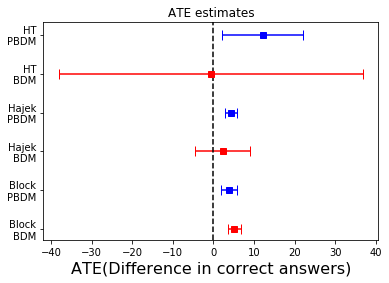

In [20]:
f=plt.figure()
z_critical = stats.norm.ppf(q = 0.975)
y_values_bdm = [1,3,5]
y_values_pbdm=[2,4,6]
y_values=[1,2,3,4,5,6]
tick_names = ['Block\nBDM','Block\nPBDM','Hajek\nBDM','Hajek\nPBDM','HT\nBDM','HT\nPBDM']
x_values_bdm = [block_bdm,hajek_bdm,ht_bdm]
x_values_pbdm = [block_pbdm,hajek_pbdm,ht_pbdm]
sd_bdm = [sd_block_bdm,sd_hajek_bdm,sd_ht_bdm]
sd_pbdm = [sd_block_pbdm,sd_hajek_pbdm,sd_ht_pbdm]
confidence_bdm = [(x_values_bdm[i]-z_critical*sd_bdm[i],x_values_bdm[i]+z_critical*sd_bdm[i]) for i in range(len(sd_bdm))]
confidence_pbdm = [(x_values_pbdm[i]-z_critical*sd_pbdm[i],x_values_pbdm[i]+z_critical*sd_pbdm[i]) for i in range(len(sd_pbdm))]

plt.scatter(x_values_bdm,y_values_bdm,color="red")
plt.scatter(x_values_pbdm,y_values_pbdm,color="blue")
plt.yticks(y_values, tick_names)
(_, caps, _) =plt.errorbar(x=x_values_bdm,
             y=y_values_bdm,
             xerr=[(top-bot)/2 for top,bot in confidence_bdm],
             fmt='s',capsize=5,color="red")

for cap in caps:
    cap.set_color('red')
    cap.set_markeredgewidth(1)
    
(_, caps, _) =plt.errorbar(x=x_values_pbdm,
             y=y_values_pbdm,
             xerr=[(top-bot)/2 for top,bot in confidence_pbdm],
             fmt='s',capsize=5,color="blue")

for cap in caps:
    cap.set_color('blue')
    cap.set_markeredgewidth(1)
plt.axvline(x=0,linestyle="--",color="black")
plt.xlabel('ATE(Difference in correct answers)', fontsize=16)
plt.title('Number of Correct Answers ATE', fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
plt.title("ATE estimates")
f.savefig("confidence_intervals.pdf", bbox_inches='tight')

In [21]:
print(x_values_bdm)
print(x_values_pbdm)
print(confidence_bdm)
print(confidence_pbdm)

[5.1904761904761898, 2.2370694355867311, -0.63143778285539831]
[3.8080581300676997, 4.2618625164321102, 12.093549567597641]
[(3.5671513796267864, 6.8138010013255936), (-4.556445557369746, 9.0305844285432073), (-38.099301423942805, 36.836425858232005)]
[(1.9122907680972032, 5.7038254920381961), (2.7860277617669587, 5.7376972710972618), (2.0970048059628166, 22.090094329232464)]


<h4>Evolution of estimator</h4>

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=n

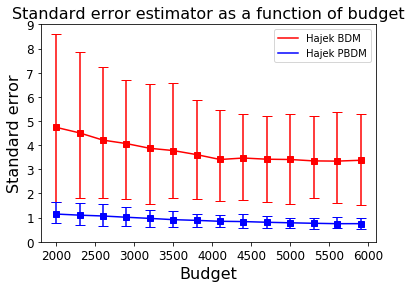

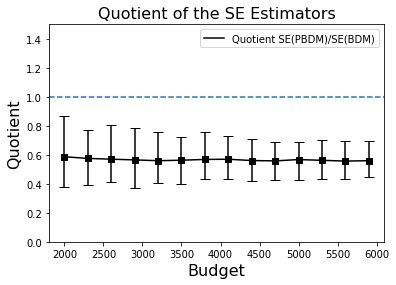

In [22]:


def bootstrap_variance(df,estimator,name,n_boot):
    boot_sample=[]
    df= df.copy()
    for i in range(n_boot):
        boot_df = df.loc[np.random.choice(range(n_pbdm),n_pbdm)].reset_index(True)
        _,sd = estimator(boot_df,name)
        boot_sample.append(sd)
        print('%s of %s' %(i,n_boot))
        if sum(np.isnan(boot_sample))==1:
            break
    sd = np.median(boot_sample)
    conf= (np.percentile(boot_sample,2.5),np.percentile(boot_sample,97.5))
    return sd, conf

#hajek_pbdm_sd,hajek_pbdm_conf = bootstrap_variance(df_pbdm,hajek_ate_var_null,'PBDM',1000)
#hajek_bdm_sd,hajek_bdm_conf = bootstrap_variance(df_bdm,hajek_ate_var_null,'BDM',1000)


####### Hajek estimator variance cost evolution


def evolution(df,estimator,name,color,nboot=200):
    cost_list = []
    sd_list = []
    conf_list=[]
    df  = df.copy()
    n = df.shape[0]
    max_budget = int(np.ceil(max(cost_bdm,cost_pbdm)))
    for budget in range(2000,max_budget,300):
        boot_sample = []
        for _ in range(nboot):
            boot_df = df.copy()
            boot_df = boot_df.loc[np.random.choice(range(n),n)].reset_index(drop=True)
            cost  = 500
            i=1
            while(cost<budget and i<n ):
                i += 1
                df_aux = boot_df.loc[:i]
                cost = sum((df_aux['nCorrect']-(20-df_aux['nCorrect']))*10-df_aux['pbdmOffer']*df_aux['treated'])
            _,sd = estimator(df_aux,name)
            boot_sample.append(sd)
            if np.sum(np.isnan(boot_sample))==1:
                break

        sd = np.nanmean(boot_sample)
        conf = (np.nanpercentile(boot_sample,2.5),np.nanpercentile(boot_sample,97.5))
        cost_list.append(budget)
        sd_list.append(sd)
        conf_list.append(conf)
    m = len(sd_list)
    plt.plot(np.array(cost_list),sd_list,label=name,color=color)
    plt.errorbar(x=np.array(cost_list), y=sd_list,fmt='s',capsize=5,yerr=[[-conf_list[i][0] + sd_list[i] for i in range(m)],
                                                                          [conf_list[i][1] - sd_list[i] for i in range(m)]],color=color)

    return(cost_list,sd_list,conf_list)




f_budget =plt.figure()
evolution(df_bdm,hajek_ate_var_null,"Hajek BDM","red")
evolution(df_pbdm,hajek_ate_var_null,"Hajek PBDM","blue")
plt.ylim([0,9])
plt.legend()
plt.title("Standard error estimator as a function of budget",fontsize=16)
plt.xlabel("Budget",fontsize=16)
plt.ylabel("Standard error",fontsize=16)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
f_budget.savefig("sd_budget_hajek.pdf", bbox_inches='tight')

f=plt.figure()
cost_list,sd_list,conf_list=evolution(df_pbdm,hajek_quotient_null_ate_var,"Quotient SE(PBDM)/SE(BDM)","black")
plt.legend()
plt.ylim([0,1.5])
plt.axhline(y=1,linestyle="--")
plt.title("Quotient of the SE Estimators",fontsize=16)
plt.xlabel("Budget",fontsize=16)
plt.ylabel("Quotient",fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
f.savefig("quotient_of_estimators.pdf", bbox_inches='tight')



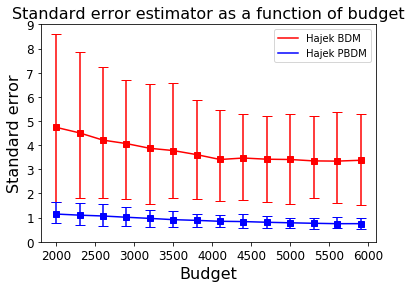

In [23]:
ax = f_budget.get_axes()
ax[0].set_ylim(0,9)
f_budget

<h4>Demand Estimation </h4>

In [24]:
import seaborn as sns; sns.set(color_codes=True)
def estimate_demand(df,name,color):
    
    n = df.shape[0]
    df_demands=pd.DataFrame()
    for i in range(1000):
        demand = []
        df_boot = df.loc[np.random.choice(range(n),replace=True,size=n)]
        for price in range(200):
            demand.append(np.sum(df_boot['pbdmBid']>=price)/float(n))
        df_demands["time_"+str(i)] = demand
    return df_demands
    #ax = sns.tsplot(data=np.array(df_demands))
    #plt.plot(list(range(200)),demand,label=name,color=color)
    #plt.yticks([0,0.25,0.5,0.75,1],["0%","25%","50%","75%","100%"])


df_demands_bdm=estimate_demand(df_bdm,"BDM","Red")
df_demands_pbdm=estimate_demand(df_pbdm,"PBDM","Blue")


/usr/local/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0. Returning /usr/local/lib/python2.7/s

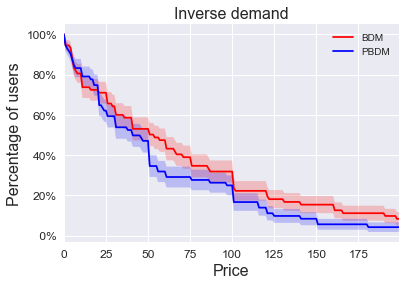

In [25]:
df_demands_bdm['id'] = df_demands_bdm.index
df_demands_bdm_melt=df_demands_bdm.melt(id_vars=['id'])
df_demands_bdm_melt['Mechanism']="BDM"

df_demands_pbdm['id'] = df_demands_pbdm.index
df_demands_pbdm_melt=df_demands_pbdm.melt(id_vars=['id'])
df_demands_pbdm_melt['Mechanism']="PBDM"
df_demands = df_demands_bdm_melt.append(df_demands_pbdm_melt)
df_demands['time'] = df_demands['variable'].apply(lambda x: float(x[5:]))
f,ax=plt.subplots(1,1)
sns.tsplot(data=df_demands,ci="sd",condition="Mechanism",time="id",value="value",unit="time",color={"BDM":"red","PBDM":"blue"})
plt.legend()
plt.ylabel('Percentage of users',fontsize=16)
plt.xlabel('Price',fontsize=16)
plt.title("Inverse demand",fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_yticklabels(['{:2d}%'.format(x) for x in np.arange(-20,120,20)])
f.savefig("demand.pdf", bbox_inches='tight')


In [26]:
def cate(df,name,degree):    
    
    # Heterogeneous treatment effect
    z_critical = stats.norm.ppf(q = 0.975)
    step_size  = 20
    outcome_list = []
    sd_list=[]
    xnew=[]

    for i in range(0,200,10):
        try:
            df_spline = df.copy()[df['pbdmBid'].apply(lambda x: (i-step_size)<=x and x<=(i+step_size))]
            mu,sigma = hajek_ate_var_null(df_spline,name)
            outcome_list.append(mu)
            sd_list.append(sigma)
            xnew.append(i)
        except:
            pass

    
    outcome_list = np.array(outcome_list)
    sd_list=np.array(sd_list)
    n = len(outcome_list)
    outcome_smooth = BSpline(xnew,outcome_list,degree)
    ub = (outcome_list+z_critical*sd_list)
    lb = (outcome_list-z_critical*sd_list)
    ub_smooth = BSpline(xnew,ub,degree)
    lb_smooth = BSpline(xnew,lb,degree)

    f = plt.figure()
    plt.plot(range(200),outcome_smooth(range(200)),color="blue",label="E[Y(1)-Y(0)|W]")
    plt.fill_between(range(200), lb_smooth(range(200)), ub_smooth(range(200)),alpha=0.3)
    plt.plot(range(200),lb_smooth(range(200)),linestyle="--",color="blue")
    plt.plot(range(200),ub_smooth(range(200)),linestyle="--",color="blue",label="CI 95%")
    plt.ylim((-1,8))
    plt.axhline(y=hajek_pbdm,linewidth=2, color='r',linestyle="--",label="Hajek ATE")
    plt.legend()
    plt.axhline(y=0,linewidth=2,linestyle="--",color="black")
    plt.ylim(-8,8)
    plt.title("Conditional Average Treatment Effect")
    plt.xlabel("Willingness to Pay")
    plt.ylabel("CATE")
    f.savefig("CATE_pbdm.pdf", bbox_inches='tight')
    

    return outcome_smooth

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Helvetica
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1330: UserWarning: findfont: Could not match :family=Helvetica:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/local/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts/Helvetica-Bold.afm
  UserWarning)
/usr/local/lib/python3.

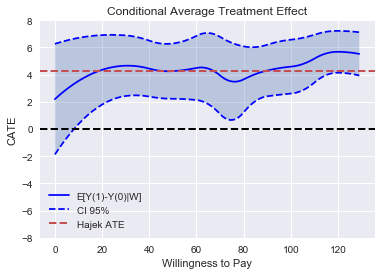

In [27]:
cate(df_pbdm,"PBDM",2)

